<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Esperanza%2C_Varianza%2C_Covarianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar y cargar librerias

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

In [2]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [3]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [4]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [5]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

In [6]:
def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

### Funciones nuevas

#### genera_muestras_de_texto()

In [7]:
def genera_muestras_de_texto(texto, grado=0, 
                             num_muestras=100, 
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

#### contar_caracteres_por_tipo()

In [8]:
def contar_caracteres_por_tipo(texto):
  '''Funcion que devuelve una tupla con el conteo de vocales, 
  consonantes y espacios que existen en un texto'''
  cuenta_vocales = 0
  cuenta_consonantes = 0
  cuenta_espacios = 0
  for caracter in texto:
    if caracter in vocales:
      cuenta_vocales +=1
    elif caracter in espacio:
      cuenta_espacios +=1
    else:
      cuenta_consonantes +=1
  return cuenta_vocales, cuenta_consonantes, cuenta_espacios

## Leer y prepocesar texto

In [9]:
from google.colab import files  #para importar archivos a cloab
files.upload()

Saving gabriel_garcia_marquez_cien_annos_soledad.txt to gabriel_garcia_marquez_cien_annos_soledad.txt


{'gabriel_garcia_marquez_cien_annos_soledad.txt': b'Gabriel Garc\xc3\xada M\xc3\xa1rquez \n\n\n\nCien a\xc3\xb1os de soledad \n\n\n\nEDITADO POR "EDICIONES LA CUEVA" \n\n\n\nPara J omi Garc\xc3\xada Ascot \ny Mar\xc3\xada Luisa Elio \n\n\n\nCien a\xc3\xb1os de soledad \n\n\n\nGabriel Garc\xc3\xada M\xc3\xa1rquez \n\n\n\nMuchos a\xc3\xb1os despu\xc3\xa9s, frente al pelot\xc3\xb3n de fusilamiento, el coronel Aureliano Buend\xc3\xada hab\xc3\xada de \nrecordar aquella tarde remota en que su padre lo llev\xc3\xb3 a conocer el hielo. Macondo era entonces \nuna aldea de veinte casas de barro y ca\xc3\xb1abrava construidas a la orilla de un r\xc3\xado de aguas di\xc3\xa1fanas \nque se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos \nprehist\xc3\xb3ricos. El mundo era tan reciente, que muchas cosas carec\xc3\xadan de nombre, y para \nmencionarlas hab\xc3\xada que se\xc3\xb1alar\xc3\xadas con el dedo. Todos los a\xc3\xb1os, por el mes de marzo, una familia \nde gita

In [10]:
libro = leer_libro('gabriel_garcia_marquez_cien_annos_soledad.txt')
libro[:400]

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio Cien años de soledad Gabriel García Márquez Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava'

## Preprocesar texto

Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo

In [11]:
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes

In [12]:
libro_limpio = limpiar_texto(libro)

# Separar de caracteres por tipo 

In [13]:
caracteres = 'abcdefghijklmnopqrstuvwxyz'
len(caracteres)

26

In [14]:
#identificar vocales, espacios y consonantes
vocales = 'aeiou'
espacio = ' '

consonantes = ""
for e in caracteres:
  if e not in (vocales + espacio):
    consonantes += e

print(consonantes)

bcdfghjklmnpqrstvwxyz


## Probabilidad de ocurrencia de vocales, consonantes y espacios

In [25]:
vo_co_es = contar_caracteres_por_tipo(libro_limpio)
vo_co_es =[x/len(libro_limpio) for x in vo_co_es]
vo_co_es

[0.3840527256252816, 0.44122783483758626, 0.17471943953713218]

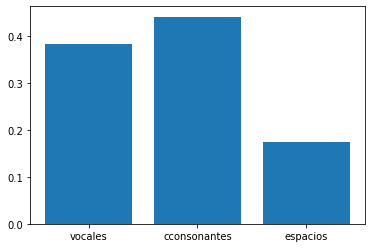

In [26]:
plt.bar( ["vocales", "consonantes", "espacios"],  vo_co_es)
plt.ylabel('probabilidad')
plt.
plt.show()

# Construir 100 muestras para orden 0

In [32]:
gr = 0           #grado
n_car = 200      #cantidad de caracteres en el texto generado
textos = 100     #cantidad de textos a generar

#Generar la serie de textos
serie_textos = genera_muestras_de_texto(libro_limpio, 
                                        grado = gr,
                                        num_muestras = textos, 
                                        tam_muestra = n_car)
serie_textos.head()

0     tcmssabeaol  erst oao osa di recreslocglcmcee...
1    u yeemdssbcn doa  p s bcoa an aar r riqena aq ...
2     ec es l emcualoasr ult d  mrnnaiuenretnsnoe m...
3    oaealdarlase saaaaatrshpospacen ootao roasbdln...
4    l   idg soobsoeapnia a eoard pc b r deita  loi...
Name: muestra, dtype: object

In [33]:
serie_textos[30:40]

30    s s oibtnp reaayooe bis a rqeeoanievneliaaipdo...
31    i nnsssaars oe ug eaomor e srl ue na icanperd ...
32    rlorati rn vaol ld at tniol nausior    colsobn...
33    t eel oldasr lis t edio p aebntimsenzcicnpdejs...
34    oeabu ned dni a re bo to oaanoide  epne g eaft...
35    nera nrciele vrasrnuo j iri n a dobnroaenuroae...
36    s nisn o troddtdaelnsniqer sob bamnani dmd osa...
37    edtldot  suts solrlssiae eraaeestaofoaaqeracaq...
38    tbs  dasnnn  bahiaj ecrierlaipobrca bqn umcenm...
39    euoo rlr drcn  yalc n rsaigledeas lzn  r deiap...
Name: muestra, dtype: object

## Contar vocales, consonantes y espacios de cada muestra

In [67]:
datos =pd.DataFrame()
datos['texto'] = serie_textos
datos

,texto
0,tcmssabeaol erst oao osa di recreslocglcmcee...
1,u yeemdssbcn doa p s bcoa an aar r riqena aq ...
2,ec es l emcualoasr ult d mrnnaiuenretnsnoe m...
3,oaealdarlase saaaaatrshpospacen ootao roasbdln...
4,l idg soobsoeapnia a eoard pc b r deita loi...
...,...
95,o patoteqalaqmrouorxds turl cbrdq crorln nes ...
96,a sisetd huls l t a u a pjlsiocleasau nana ui...
97,galiqivlal pp et ab apa old tdcdd aampu isser...
98,oe u da so shaaplea pdglol sssarouaonysonespl...


In [68]:
tupla_cuentas = datos['texto'].apply(contar_caracteres_por_tipo)
tupla_cuentas

0     (85, 85, 30)
1     (69, 92, 39)
2     (72, 90, 38)
3     (76, 97, 27)
4     (78, 86, 36)
          ...     
95    (72, 87, 41)
96    (69, 96, 35)
97    (78, 85, 37)
98    (85, 84, 31)
99    (87, 78, 35)
Name: texto, Length: 100, dtype: object

In [69]:
datos['vocales'], datos['consonantes'], datos['espacios']= zip(*tupla_cuentas)
datos = datos.set_index('texto')
datos =datos.div(200)
datos.reset_index()

,texto,vocales,consonantes,espacios
0,tcmssabeaol erst oao osa di recreslocglcmcee...,0.425,0.425,0.150
1,u yeemdssbcn doa p s bcoa an aar r riqena aq ...,0.345,0.460,0.195
2,ec es l emcualoasr ult d mrnnaiuenretnsnoe m...,0.360,0.450,0.190
3,oaealdarlase saaaaatrshpospacen ootao roasbdln...,0.380,0.485,0.135
4,l idg soobsoeapnia a eoard pc b r deita loi...,0.390,0.430,0.180
...,...,...,...,...
95,o patoteqalaqmrouorxds turl cbrdq crorln nes ...,0.360,0.435,0.205
96,a sisetd huls l t a u a pjlsiocleasau nana ui...,0.345,0.480,0.175
97,galiqivlal pp et ab apa old tdcdd aampu isser...,0.390,0.425,0.185
98,oe u da so shaaplea pdglol sssarouaonysonespl...,0.425,0.420,0.155


## Calcular Esperanza, Varianza y Desviación Estándar
de las variables vocales, consonantes y espacios de las 100 muestras

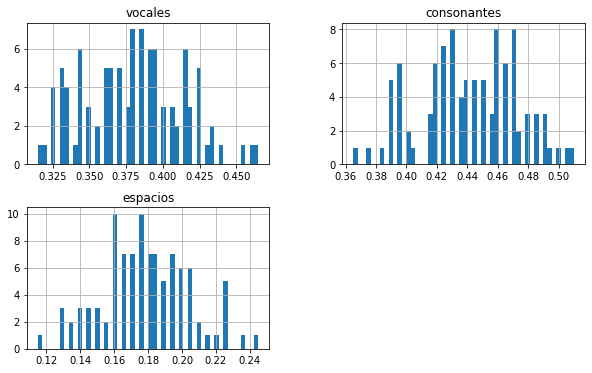

In [70]:
datos.hist(figsize=(10, 6), bins=50)
plt.show()

### Cálculo sin usar funciones especiales

In [100]:
esperanza = datos['vocales'].sum()/len(datos)
varianza = sum((datos['vocales']- media)**2) /len(datos)
desviacion = math.sqrt(varianza)
print('promedio: ', promedio, 
      '\nvarianza: ', varianza,
      '\ndesviación estándar:',desviacion)


promedio:  0.17845000000000003 
varianza:  0.041760092499999985 
desviación estándar: 0.20435286271545106


### Cálculo usando el método de numpy y pandas


In [71]:
datos.describe()

,vocales,consonantes,espacios
count,100.000000,100.000000,100.000000
mean,0.379900,0.441650,0.178450
std,0.034495,0.031854,0.025601
min,0.315000,0.365000,0.115000
25%,0.353750,0.420000,0.160000
50%,0.380000,0.442500,0.175000
75%,0.405000,0.465000,0.195000
max,0.465000,0.510000,0.245000


In [ ]:
datos.var()

vocales        0.001182
consonantes    0.000830
espacios       0.000830
dtype: float64

## Análisis de covarianza y correlación

In [ ]:
datos.cov()

,vocales,consonantes,espacios
vocales,0.001373,-0.000808,-0.000565
consonantes,-0.000808,0.000954,-0.000147
espacios,-0.000565,-0.000147,0.000712


In [ ]:
datos.corr()

,vocales,consonantes,espacios
vocales,1.000000,-0.705508,-0.571791
consonantes,-0.705508,1.000000,-0.178016
espacios,-0.571791,-0.178016,1.000000


# Probabilidad de ocurrencia de vocales, consonantes y espacios en el libro 100 años de soledad

In [ ]:
vo_co_es = contar_caracteres_por_tipo(libro_limpio)
vo_co_es =[x/len(libro_limpio) for x in vo_co_es]
vo_co_es

[0.3840527256252816, 0.44122783483758626, 0.17471943953713218]

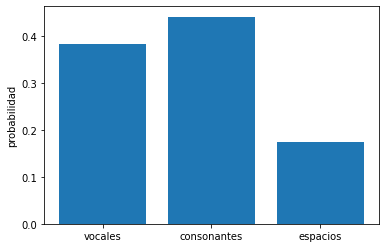

In [28]:
plt.bar( ["vocales", "consonantes", "espacios"],  vo_co_es)
plt.ylabel('probabilidad')
plt.show()

## Análisis con grado 1

In [ ]:
%%time
gr = 1           #grado
n_car = 200      #cantidad de caracteres en el texto generado
textos = 100     #cantidad de textos a generar

#Generar la serie de textos
serie_textos_g1= genera_muestras_de_texto(libro_limpio, grado = gr, 
                          num_muestras = textos, tam_muestra = n_car)





CPU times: user 2min 3s, sys: 213 ms, total: 2min 3s
Wall time: 2min 3s
